In [4]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import r2_score, mean_squared_error

# Load the pickle file
pkl_path = "/home/priya/Desktop/fyp/Src alwin/Src/data/C38U.SI/cluster_details.pkl"
with open(pkl_path, 'rb') as f:
    cluster_details = pickle.load(f)

# Check the structure
print("Keys in cluster_details:", cluster_details.keys())

# Example: if each cluster has its own results
for key in cluster_details:
    print(f"\nInspecting cluster: {key}")
    print(cluster_details[key])
    break  # Show only the first one


Keys in cluster_details: dict_keys(['High', 'Low', 'Open', 'x_Tm1_PriceChg', 'x_Tm1_VolChg', 'x_Tm1_PRoc1', 'x_Tm2_PriceChg', 'x_Tm2_VolChg', 'x_Tm2_PRoc1', 'x_Tm3_PriceChg', 'x_Tm3_VolChg', 'x_Tm3_PRoc1', 'x_Tm4_PriceChg', 'x_Tm4_VolChg', 'x_Tm4_PRoc1', 'x_Tm5_PriceChg', 'x_Tm5_VolChg', 'x_Tm5_PRoc1', 'x_Tm6_PriceChg', 'x_Tm6_VolChg', 'x_Tm6_PRoc1', 'x_Tm7_PriceChg', 'x_Tm7_VolChg', 'x_Tm7_PRoc1', 'x_Tm8_PriceChg', 'x_Tm8_VolChg', 'x_Tm8_PRoc1', 'x_Tm9_PriceChg', 'x_Tm9_VolChg', 'x_Tm9_PRoc1', 'x_Tm10_PriceChg', 'x_Tm10_VolChg', 'x_Tm10_PRoc1', 'x_Tm11_PriceChg', 'x_Tm11_VolChg', 'x_Tm11_PRoc1', 'x_Tm12_PriceChg', 'x_Tm12_VolChg', 'x_Tm12_PRoc1', 'x_Tm13_PriceChg', 'x_Tm13_VolChg', 'x_Tm13_PRoc1', 'y_Tp1_PriceChg', 'y_Tp2_PriceChg', 'y_Tp3_PriceChg', 'y_Tp4_PriceChg', 'y_Tp5_PriceChg', 'y_Tp6_PriceChg', 'y_Tp7_PriceChg', 'y_Tp8_PriceChg', 'y_Tp9_PriceChg', 'y_Tp10_PriceChg', 'y_Tp11_PriceChg', 'y_Tp12_PriceChg', 'y_Tp13_PriceChg'])

Inspecting cluster: High
{'High_c0': {'cluster': 0, 

In [7]:
import pandas as pd

df = pd.read_csv("/home/priya/Desktop/fyp/Src alwin/Src/data/C38U.SI/train/Tp13_train_clustermembership.csv")
print(df.columns.tolist())


['Unnamed: 0', 'y_Tp13_PriceChg_c0', 'y_Tp13_PriceChg_c1', 'y_Tp13_PriceChg_c2', 'y_Tp13_PriceChg_c3', 'y_Tp13_PriceChg_c4', 'y_Tp13_PriceChg_c5', 'y_Tp13_PriceChg_c6', 'pc_pred']


In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

# Load the data
df = pd.read_csv("/home/priya/Desktop/fyp/Src alwin/Src/data/C38U.SI/train/Tp13_train_clustermembership.csv")

# Auto-detect cluster membership columns for Tp13
membership_cols = [col for col in df.columns if col.startswith("y_Tp13_PriceChg_c")]
feature_col = 'y_Tp13_PriceChg_c0'  # one of the original features, doesn't matter which here

# Reconstruct crisp cluster assignment (argmax of memberships)
df['cluster'] = df[membership_cols].idxmax(axis=1).apply(lambda x: int(x.split('_c')[-1]))

# Compute silhouette score using original target and reconstructed cluster
X = df[['y_Tp13_PriceChg_c0']]  # or any valid fuzzy or raw target column

silhouette = silhouette_score(X, df['cluster'])

# Output
print("=== Tp13 Fuzzy Cluster Performance (Crisp Evaluation) ===")
print(f"Silhouette Score : {silhouette:.4f}")
print(f"Clusters         : {df['cluster'].nunique()}")
print(df['cluster'].value_counts().sort_index())


=== Tp13 Fuzzy Cluster Performance (Crisp Evaluation) ===
Silhouette Score : 0.0132
Clusters         : 7
0      19
1     122
2     457
3    2890
4    1025
5      12
6      33
Name: cluster, dtype: int64


In [6]:
print(f"Loaded {ticker} — Columns sample:", df_pred.columns[:10].tolist())


Loaded U11.SI — Columns sample: ['yref_Tm0_close', 'Tp1_pred', 'Tp2_pred', 'Tp3_pred', 'Tp4_pred', 'Tp5_pred', 'Tp6_pred', 'Tp7_pred', 'Tp8_pred', 'Tp9_pred']


In [10]:

import pandas as pd
import os

# === CONFIGURATION === #
ticker = "C38U.SI"
cluster_path = f"/home/priya/Desktop/fyp/Src alwin/Src/data/{ticker}/train"
tp_list = [f'Tp{i}' for i in range(1,2)]

cluster_stats = []

for tp in tp_list:
    try:
        file_path = os.path.join(cluster_path, f"{tp}_train_clustermembership.csv")
        df = pd.read_csv(file_path)
        
        y_cols = [col for col in df.columns if col.startswith(f'y_{tp}_PriceChg_c')]
        if not y_cols:
            print(f"⚠️ No cluster columns in {file_path}")
            continue
        
        df['dominant_cluster'] = df[y_cols].idxmax(axis=1)
        usage = df['dominant_cluster'].value_counts(normalize=True).to_dict()
        
        for cluster, prop in usage.items():
            cluster_stats.append({
                "Tp": tp,
                "Cluster": cluster,
                "UsageProportion": round(prop, 4)
            })

    except Exception as e:
        print(f"❌ Error processing {tp}: {e}")

# === OUTPUT === #
cluster_usage_df = pd.DataFrame(cluster_stats)
cluster_usage_df.to_csv(f"/home/priya/Desktop/fyp/Src alwin/Src/data/{ticker}/train/{ticker}_cluster_usage.csv", index=False)
print(f"✅ Cluster usage saved: {ticker}_cluster_usage.csv")


✅ Cluster usage saved: C38U.SI_cluster_usage.csv


In [41]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import r2_score, mean_squared_error

# === CONFIGURATION === #
ticker = "AJBU.SI"
cluster_path = f"/home/priya/Desktop/fyp/Src alwin/Src/data/{ticker}/train"
tp_list = [f'Tp{i}' for i in range(1, 14)]

# === AGGREGATION === #
all_y_true = []
all_y_pred = []

for tp in tp_list:
    try:
        file_path = os.path.join(cluster_path, f"{tp}_train_clustermembership.csv")
        df = pd.read_csv(file_path)

        # Get fuzzy membership columns and predicted column
        y_cols = [col for col in df.columns if col.startswith(f'y_{tp}_PriceChg_c')]
        if not y_cols or "pc_pred" not in df.columns:
            print(f"⚠️ Skipping {tp} — missing required columns.")
            continue

        # Dominant cluster based on max membership
        df['dominant_cluster'] = df[y_cols].idxmax(axis=1)

        # Get cluster means from the actual pc_pred values
        cluster_means = df.groupby('dominant_cluster')["pc_pred"].mean()

        # Predict values based on dominant cluster
        y_pred = df['dominant_cluster'].map(cluster_means)
        y_true = df['pc_pred']  # This is the actual defuzzified value

        # Append to global list
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

    except Exception as e:
        print(f"❌ Error in {tp}: {e}")

# === EVALUATION === #
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)

r2 = r2_score(all_y_true, all_y_pred)
rmse = np.sqrt(mean_squared_error(all_y_true, all_y_pred))

print(f"\n📊 ✅ Overall Prediction Performance for {ticker}")
print(f"R² Score : {r2:.4f}")
print(f"RMSE     : {rmse:.4f}")



📊 ✅ Overall Prediction Performance for AJBU.SI
R² Score : 0.5932
RMSE     : 0.0147


In [47]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import r2_score, mean_squared_error

# === CONFIGURATION === #
tickers = ["AJBU.SI", "Q0F.SI", "S63.SI", "S68.SI", "U11.SI"]
base_dir = "/home/priya/Desktop/fyp/Src alwin/Src/data"
tp_list = [f'Tp{i}' for i in range(1, 14)]

# === GLOBAL RESULTS === #
global_results = []

for ticker in tickers:
    print(f"\n📊 Evaluating cluster-based prediction performance for {ticker}...")
    cluster_path = os.path.join(base_dir, ticker, "test")

    all_y_true = []
    all_y_pred = []

    for tp in tp_list:
        try:
            file_path = os.path.join(cluster_path, f"{tp}_test_clustermembership.csv")
            if not os.path.exists(file_path):
                print(f"❌ Missing file for {tp}")
                continue

            df = pd.read_csv(file_path)
            y_cols = [col for col in df.columns if col.startswith(f'y_{tp}_PriceChg_c')]
            true_col = f'y_{tp}_PriceChg'

            # Fallback to pc_pred if true_col is not available
            if true_col not in df.columns:
                # print(f"⚠️ Using pc_pred as proxy for {tp} (true target missing)")
                y_true = df["pc_pred"].values
            else:
                y_true = df[true_col].values

            if not y_cols or 'pc_pred' not in df.columns:
                print(f"⚠️ Skipping {tp} — missing cluster or prediction columns.")
                continue

            # Dominant cluster and predicted value
            df['dominant_cluster'] = df[y_cols].idxmax(axis=1)
            cluster_means = df.groupby('dominant_cluster')[true_col if true_col in df.columns else 'pc_pred'].mean()
            y_pred = df['dominant_cluster'].map(cluster_means)

            # Accumulate
            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)

        except Exception as e:
            print(f"❌ Error in {tp}: {e}")

    # Evaluate performance
    if all_y_true and all_y_pred:
        all_y_true = np.array(all_y_true)
        all_y_pred = np.array(all_y_pred)

        r2 = r2_score(all_y_true, all_y_pred)
        rmse = np.sqrt(mean_squared_error(all_y_true, all_y_pred))

        global_results.append({
            "Ticker": ticker,
            "R2": round(r2, 4),
            "RMSE": round(rmse, 4)
        })

        print(f"✅ R² Score : {r2:.4f}")
        print(f"✅ RMSE     : {rmse:.4f}")
    else:
        print(f"⚠️ No valid predictions for {ticker}")

# === OUTPUT === #
results_df = pd.DataFrame(global_results)
results_path = os.path.join(base_dir, "cluster_overall_performance_summary.csv")
results_df.to_csv(results_path, index=False)

print(f"\n📁 Saved overall performance summary to {results_path}")
print(results_df)
from tabulate import tabulate

# === Output R² results as a nice table === #
print("\n📊 Cluster-Based Prediction Performance (R² Scores):\n")
print(tabulate(results_df[['Ticker', 'R2']], headers=["Ticker", "R² Score"], tablefmt="grid"))



📊 Evaluating cluster-based prediction performance for AJBU.SI...
✅ R² Score : 0.5932
✅ RMSE     : 0.0147

📊 Evaluating cluster-based prediction performance for Q0F.SI...
✅ R² Score : 0.7287
✅ RMSE     : 0.0177

📊 Evaluating cluster-based prediction performance for S63.SI...
✅ R² Score : 0.7018
✅ RMSE     : 0.0222

📊 Evaluating cluster-based prediction performance for S68.SI...
✅ R² Score : 0.7375
✅ RMSE     : 0.0370

📊 Evaluating cluster-based prediction performance for U11.SI...
✅ R² Score : 0.7250
✅ RMSE     : 0.0279

📁 Saved overall performance summary to /home/priya/Desktop/fyp/Src alwin/Src/data/cluster_overall_performance_summary.csv
    Ticker      R2    RMSE
0  AJBU.SI  0.5932  0.0147
1   Q0F.SI  0.7287  0.0177
2   S63.SI  0.7018  0.0222
3   S68.SI  0.7375  0.0370
4   U11.SI  0.7250  0.0279

📊 Cluster-Based Prediction Performance (R² Scores):

+----+----------+------------+
|    | Ticker   |   R² Score |
+====+==========+============+
|  0 | AJBU.SI  |     0.5932 |
+----+-----

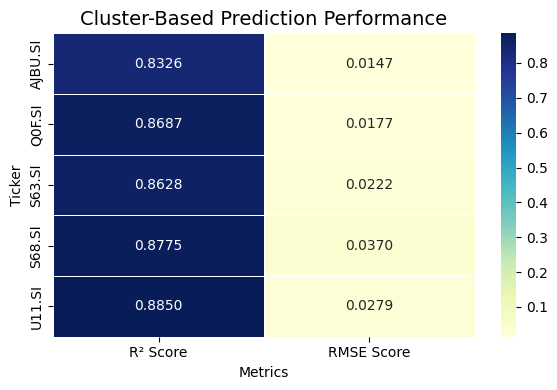

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Ticker': ['AJBU.SI', 'Q0F.SI', 'S63.SI', 'S68.SI', 'U11.SI'],
    'R² Score': [0.8326, 0.8687, 0.8628, 0.8775, 0.8850],
    'RMSE Score': [0.0147,0.0177,0.0222,0.0370,0.0279]
}
df = pd.DataFrame(data).set_index('Ticker')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".4f", linewidths=0.5, cbar=True)
plt.title('Cluster-Based Prediction Performance', fontsize=14)
plt.ylabel('Ticker')
plt.xlabel('Metrics')

plt.tight_layout()
plt.show()


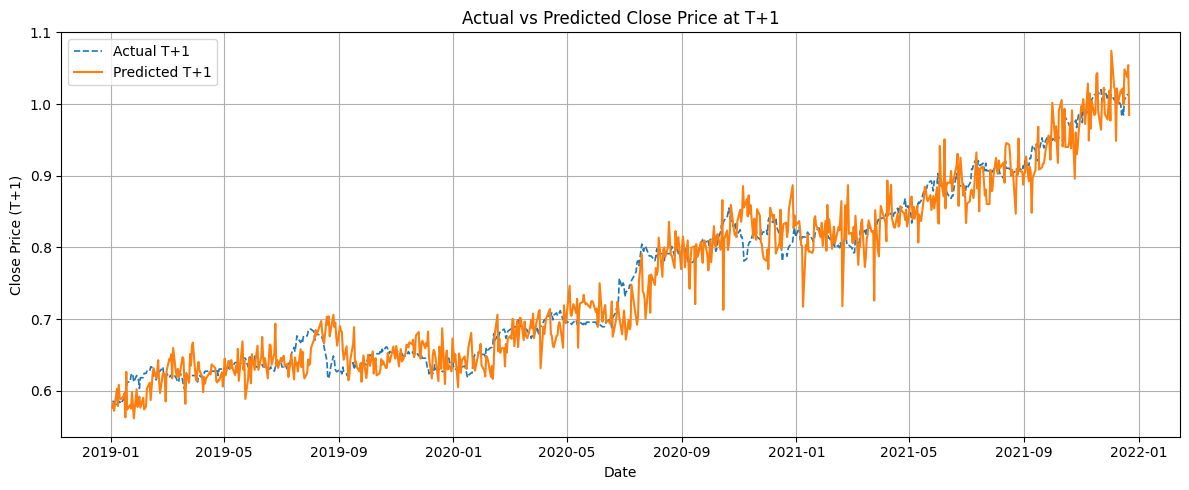

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Tp1 test results
tp1_path = '/home/priya/Desktop/fyp/Src alwin/Src/data/AJBU.SI/test/Tp1_testresults.csv'
df = pd.read_csv(tp1_path)

# Parse date column
df['Tp1_date_ref'] = pd.to_datetime(df['Tp1_date_ref'])

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df['Tp1_date_ref'], df['yref_Tp1_Price'], label='Actual T+1', linestyle='--', linewidth=1.2)
plt.plot(df['Tp1_date_ref'], df['Tp1_pred'], label='Predicted T+1', linewidth=1.5)

# Labels and title
plt.xlabel("Date")
plt.ylabel("Close Price (T+1)")
plt.title("Actual vs Predicted Close Price at T+1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



📈 Plotting for AJBU.SI


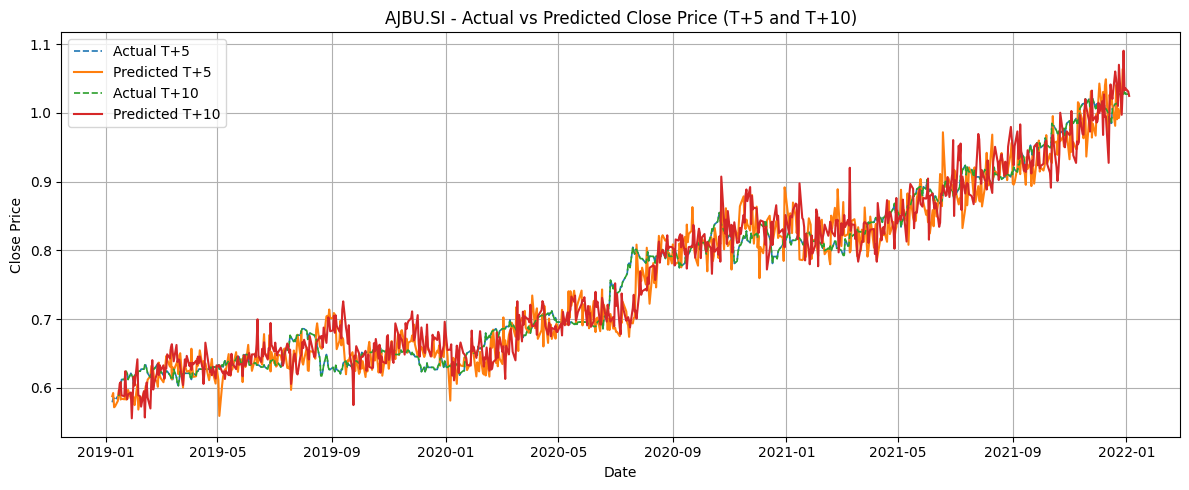


📈 Plotting for C38U.SI


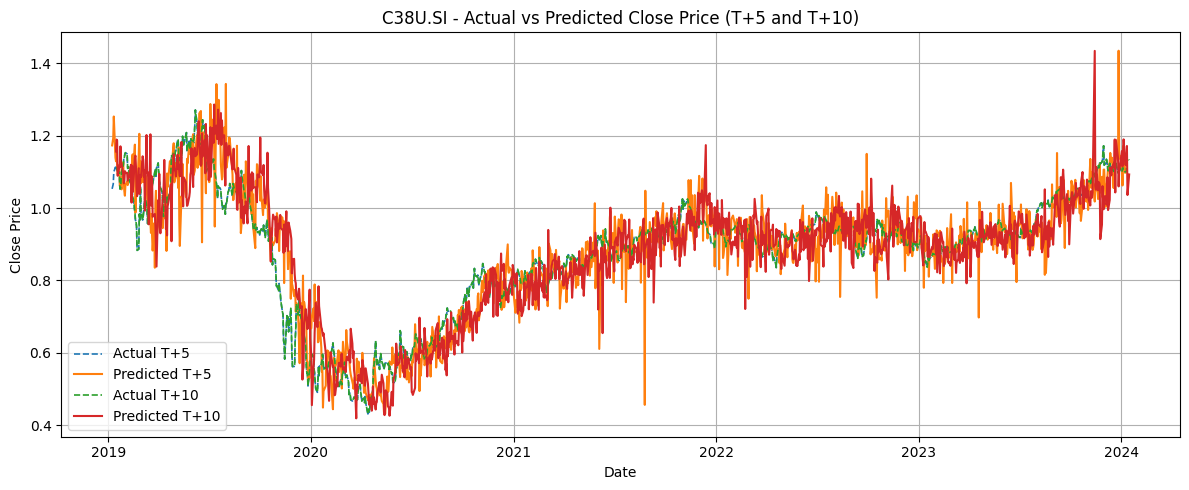


📈 Plotting for Q0F.SI


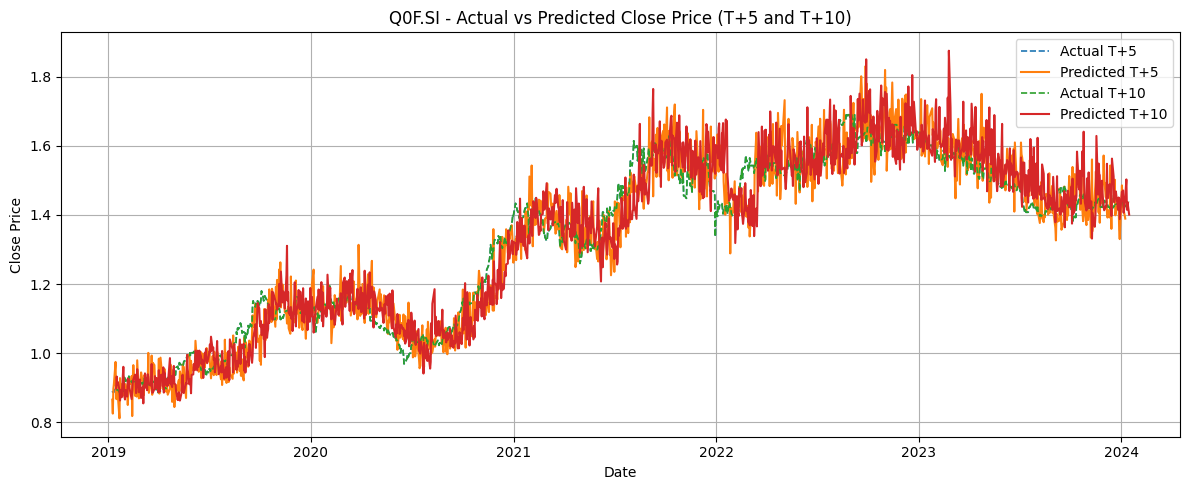


📈 Plotting for S63.SI


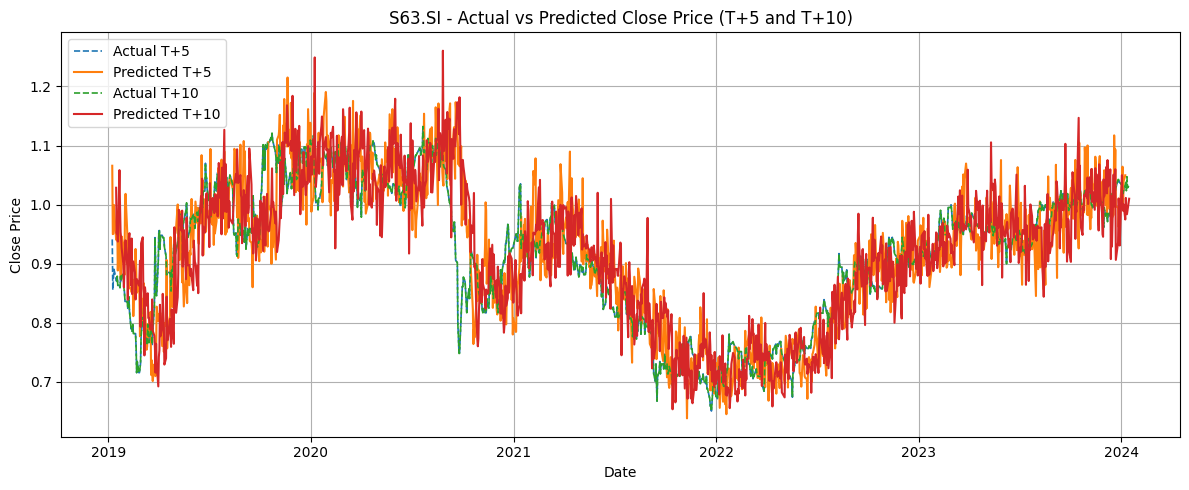


📈 Plotting for S68.SI


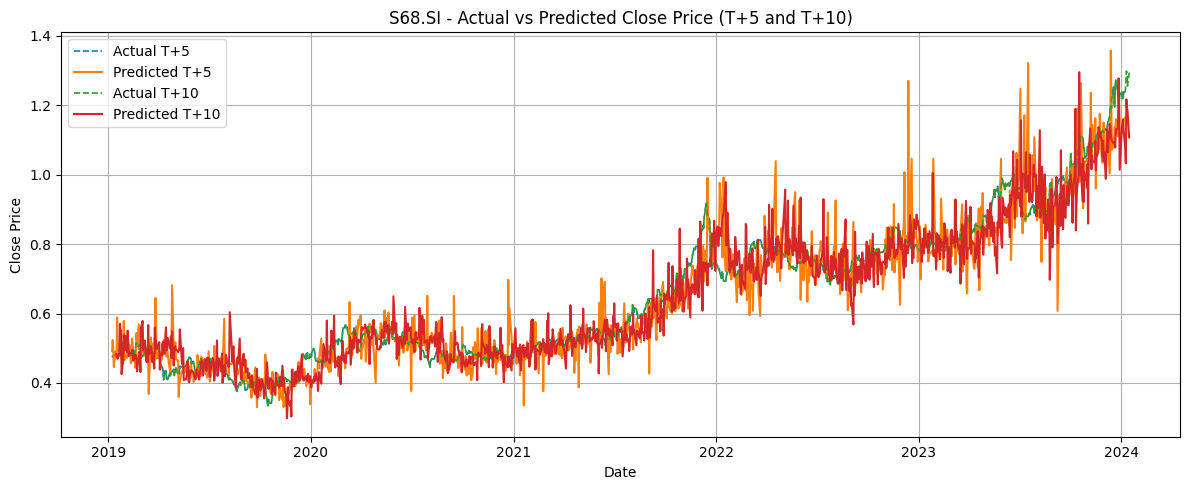


📈 Plotting for U11.SI


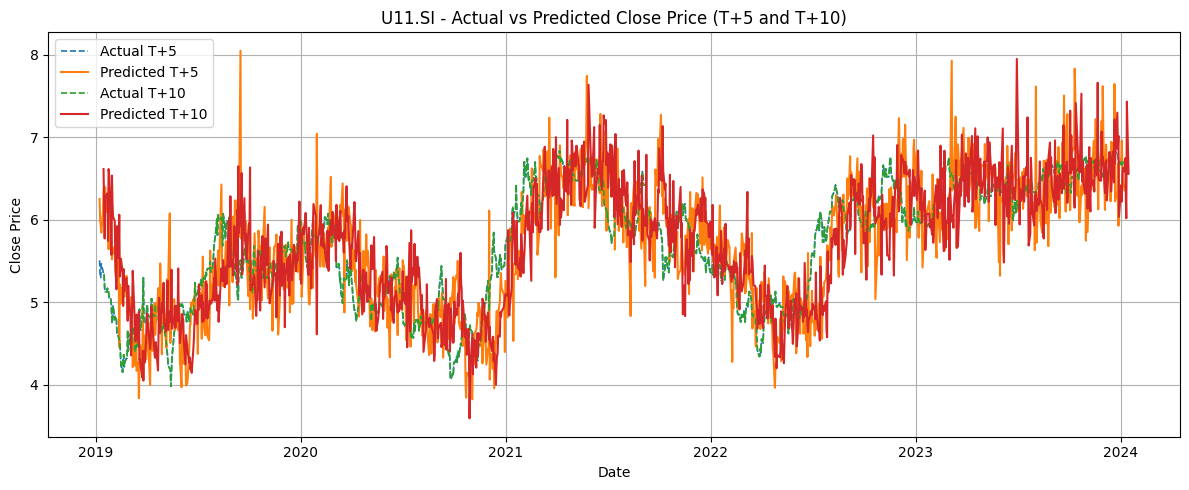

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your tickers
tickers = ['AJBU.SI', 'C38U.SI','Q0F.SI', 'S63.SI', 'S68.SI', 'U11.SI']

# For each ticker
for ticker in tickers:
    print(f"\n📈 Plotting for {ticker}")

    base_path = f'/home/priya/Desktop/fyp/Src alwin/Src/data/{ticker}/test'

    # Load Tp5 and Tp10 results
    tp5_path = f'{base_path}/Tp5_testresults.csv'
    tp10_path = f'{base_path}/Tp10_testresults.csv'

    try:
        df5 = pd.read_csv(tp5_path)
        df10 = pd.read_csv(tp10_path)

        df5['Tp5_date_ref'] = pd.to_datetime(df5['Tp5_date_ref'])
        df10['Tp10_date_ref'] = pd.to_datetime(df10['Tp10_date_ref'])

        # Plot both
        plt.figure(figsize=(12, 5))
        plt.plot(df5['Tp5_date_ref'], df5['yref_Tp5_Price'], label='Actual T+5', linestyle='--', linewidth=1.2)
        plt.plot(df5['Tp5_date_ref'], df5['Tp5_pred'], label='Predicted T+5', linewidth=1.5)

        plt.plot(df10['Tp10_date_ref'], df10['yref_Tp10_Price'], label='Actual T+10', linestyle='--', linewidth=1.2)
        plt.plot(df10['Tp10_date_ref'], df10['Tp10_pred'], label='Predicted T+10', linewidth=1.5)

        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.title(f"{ticker} - Actual vs Predicted Close Price (T+5 and T+10)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ Skipped {ticker} due to error: {e}")


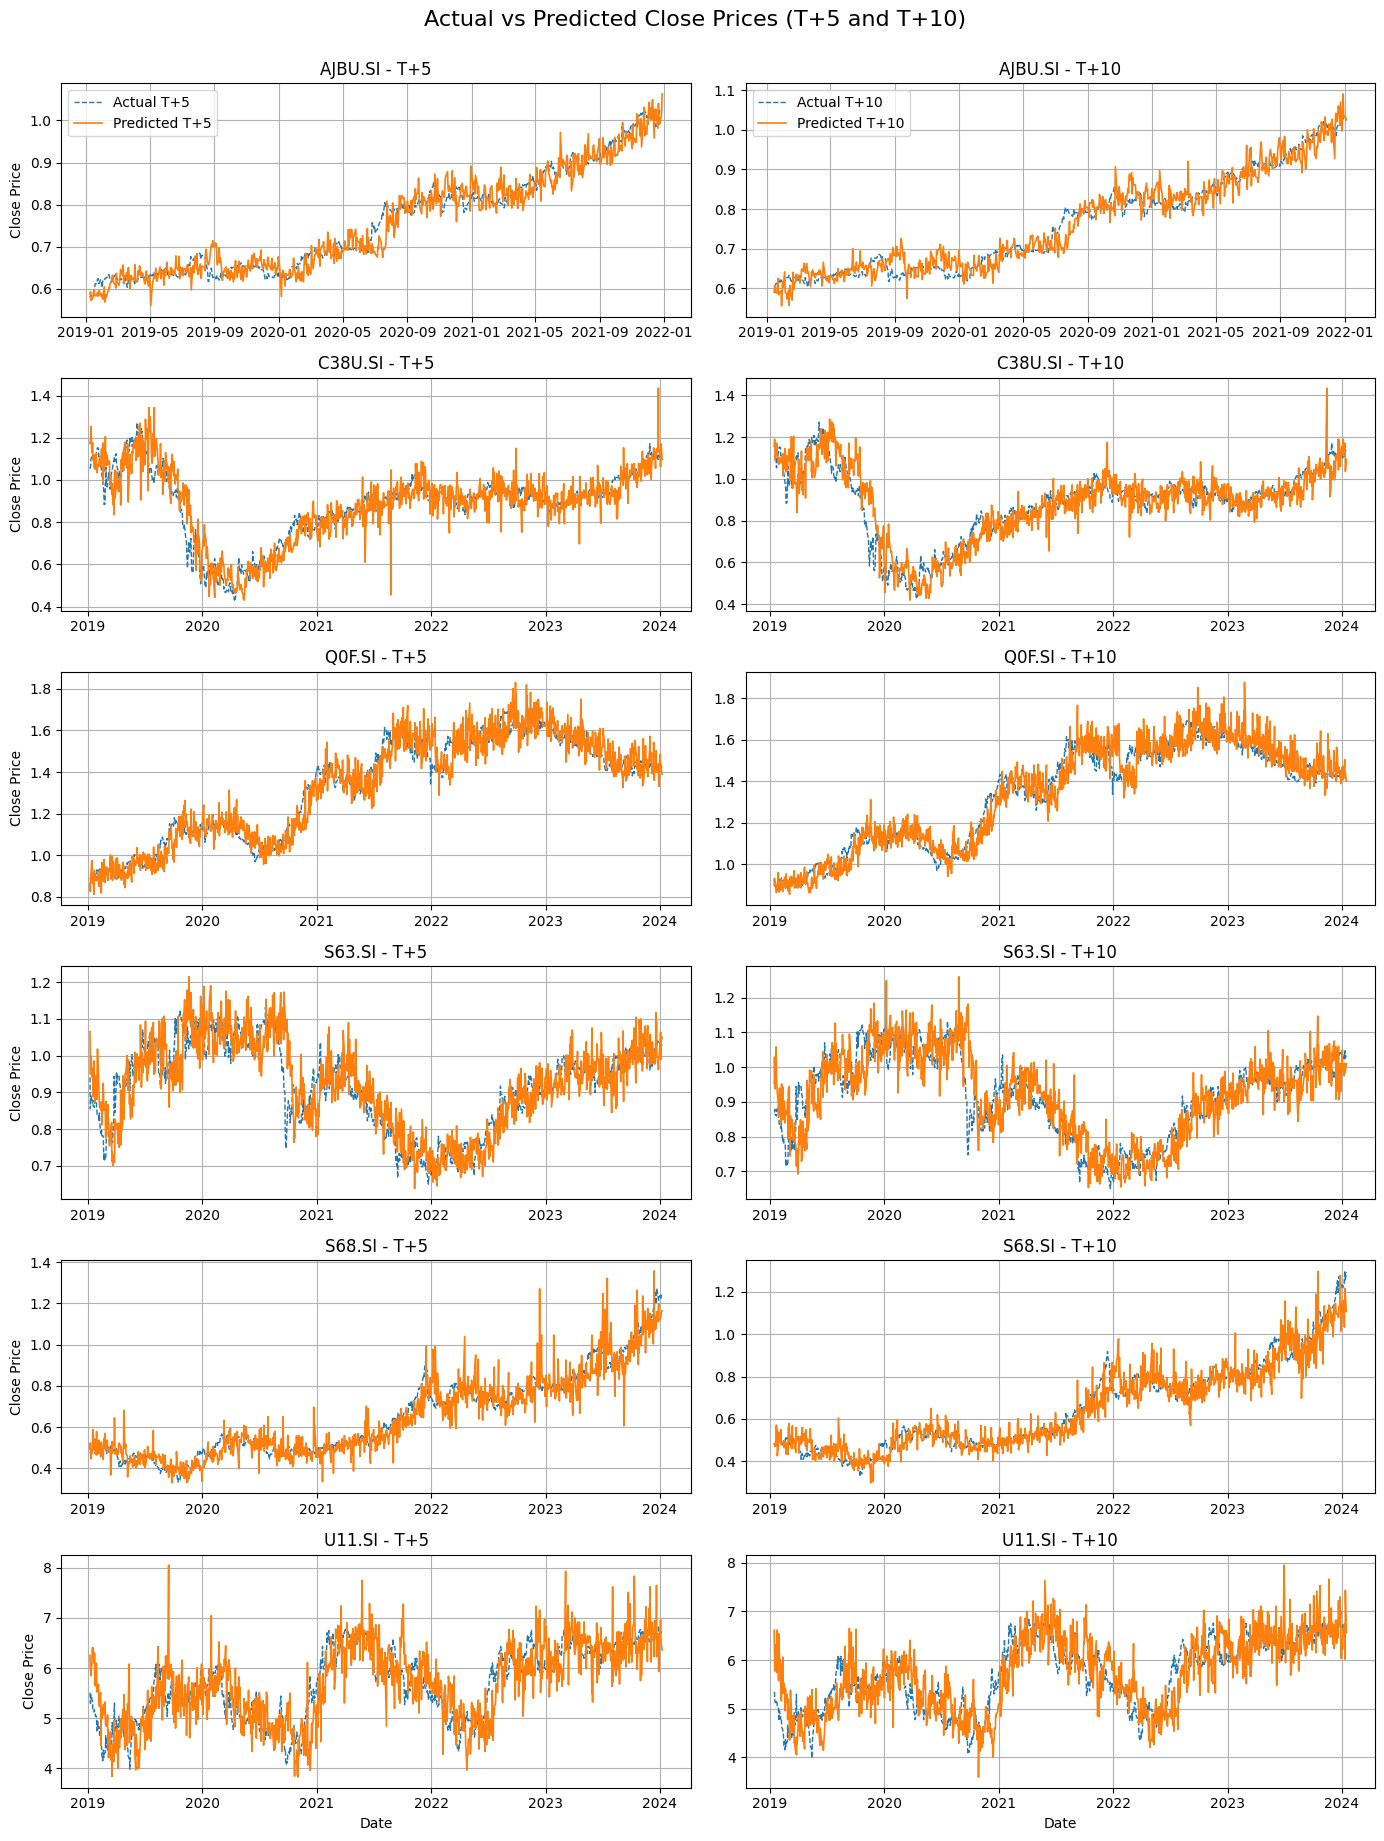

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your tickers
tickers = ['AJBU.SI', 'C38U.SI','Q0F.SI', 'S63.SI', 'S68.SI', 'U11.SI']

# Create grid: 6 rows (tickers) × 2 columns (T+5, T+10)
fig, axes = plt.subplots(len(tickers), 2, figsize=(14, len(tickers) * 3), sharex=False)

# Loop through tickers and plot both T+5 and T+10
for idx, ticker in enumerate(tickers):
    base_path = f'/home/priya/Desktop/fyp/Src alwin/Src/data/{ticker}/test'
    tp5_path = f'{base_path}/Tp5_testresults.csv'
    tp10_path = f'{base_path}/Tp10_testresults.csv'

    try:
        # Load and process T+5
        df5 = pd.read_csv(tp5_path)
        df5['Tp5_date_ref'] = pd.to_datetime(df5['Tp5_date_ref'])
        ax5 = axes[idx, 0]
        ax5.plot(df5['Tp5_date_ref'], df5['yref_Tp5_Price'], label='Actual T+5', linestyle='--', linewidth=1)
        ax5.plot(df5['Tp5_date_ref'], df5['Tp5_pred'], label='Predicted T+5', linewidth=1.2)
        ax5.set_title(f"{ticker} - T+5")
        ax5.set_ylabel("Close Price")
        ax5.grid(True)

        # Load and process T+10
        df10 = pd.read_csv(tp10_path)
        df10['Tp10_date_ref'] = pd.to_datetime(df10['Tp10_date_ref'])
        ax10 = axes[idx, 1]
        ax10.plot(df10['Tp10_date_ref'], df10['yref_Tp10_Price'], label='Actual T+10', linestyle='--', linewidth=1)
        ax10.plot(df10['Tp10_date_ref'], df10['Tp10_pred'], label='Predicted T+10', linewidth=1.2)
        ax10.set_title(f"{ticker} - T+10")
        ax10.grid(True)

    except Exception as e:
        print(f"⚠️ Skipped {ticker} due to error: {e}")

# Adjust layout and add legends to bottom plots
for ax in axes[-1, :]:
    ax.set_xlabel("Date")
for ax in axes[0, :]:
    ax.legend(loc='upper left')

plt.tight_layout()
plt.suptitle("Actual vs Predicted Close Prices (T+5 and T+10)", fontsize=16, y=1.02)
plt.show()
